In [1]:
import root_numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams["figure.figsize"] = (12, 9)
#%matplotlib notebook

Габариты кирпича: 12.4 см, 9.9 см, 7.5 см (не совпадает с данными) 

Z координата кирпича: 1293p, где p - индекс кирпича (48, 49, ...)

Все длины даны в мкм

Углы ограничены 30 градусами

не берем 57й кирпич, потому что у него размеры по x и y не совпадают с другими

In [3]:
first, last = 48, 57
h = 1293
bricks = {}

for ind in range(first, last):
    bricks[ind] = root_numpy.root2array("129294.{p}.1.1000.cp.root".format(p=ind), 
                                   treename="couples", 
                                   branches=["s.eX", "s.eY", "s.eZ", "s.eTX", "s.eTY","s.eChi2"], step=1000)

In [4]:
mc = root_numpy.root2array("mcdata_taue2.root",
                           treename="Data",
                           branches=["Event_id", "ele_P",
                                     "BT_X", "BT_Y", "BT_Z",
                                     "BT_SX", "BT_SY",
                                     "ele_x", "ele_y", "ele_z",
                                     "ele_sx", "ele_sy",
                                     "chisquare"])

в фоне Z компонента везде нулевая

Строим кирпичи, Z кирпичей: $1293p$, где $p =48,49,...,57$

In [5]:
z0 = 1293 * first
zn = 1293 * last
z_total = zn - z0
      
print(z0, zn, z_total)

62064 73701 11637


определяем в каких пределах лежат x и y

In [6]:
min_x = bricks[first][0][0]
max_x = bricks[first][0][0]
min_y = bricks[first][0][1]
max_y = bricks[first][0][1]
min_tx = bricks[first][0][2]
max_tx = bricks[first][0][2]
min_ty = bricks[first][0][3]
max_ty = bricks[first][0][3]

for brick in bricks:
    for point in bricks[brick]:
        x, y = point[0], point[1]
        tx, ty = point[3], point[4]
        if (x < min_x): min_x = x
        if (x > max_x): max_x = x
        if (y < min_y): min_y = y
        if (y > max_y): max_y = y
        if (tx < min_tx): min_tx = tx
        if (tx > max_tx): max_tx = tx
        if (ty < min_ty): min_ty = ty
        if (ty > max_ty): max_ty = ty
print("min_x: ", min_x)
print("max_x: ", max_x)
print("min_y: ", min_y)
print("max_y: ", max_y)
print("min_tx: ", min_tx)
print("max_tx: ", max_tx)
print("min_ty: ", min_ty)
print("max_ty: ", max_ty)

min_x:  28473.2382812
max_x:  71984.390625
min_y:  3514.80932617
max_y:  76514.9609375
min_tx:  -0.712779045105
max_tx:  0.742671132088
min_ty:  -0.716620147228
max_ty:  0.747953891754


In [7]:
print('pi / 4: ', np.pi / 4)
print('pi / 6: ', np.pi / 6)
print('tg(pi / 4): ', np.tan(np.pi / 4))
print('tg(pi / 6): ', np.tan(np.pi / 6))

pi / 4:  0.7853981633974483
pi / 6:  0.5235987755982988
tg(pi / 4):  1.0
tg(pi / 6):  0.57735026919


углы по TX и TY даны судя по всему в радианах в промежутке $(-pi/4, pi/4)$

(хотя оговаривалось, что углы в промежутке (-30, 30))

In [8]:
print("x width, cm: ", (max_x - min_x) / 10 ** 4)
print("y width, cm: ", (max_y - min_y) / 10 ** 4)

x width, cm:  4.35111523438
y width, cm:  7.30001516113


переведем ливни в удобный формат

In [9]:
showers = []

for smc in mc:
    xs = smc[2]
    ys = smc[3]
    zs = smc[4]
    txs = smc[5]
    tys = smc[6]
    xe = h * 0.5 * np.tan(txs)
    ye = h * 0.5 * np.tan(tys)
    ze = h * 0.5 * np.ones(len(xs))
    showers.append({'x': xs, 'y': ys, 'z': zs, 'dx': xe, 'dy': ye, 'dz': ze})

Чему равно расстояние между координатами по Z в ливнях (должно быть 1293)?
В каких промежутках находятся координаты в ливнях?
Сколько слоев в ливнях?

In [10]:
sh_dz = []

sh_z_min = showers[0]['z'][0]
sh_z_max = showers[0]['z'][0]
sh_x_min = showers[0]['x'][0]
sh_x_max = showers[0]['x'][0]
sh_y_min = showers[0]['y'][0]
sh_y_max = showers[0]['y'][0]

for shower in showers:
    j = 0
    for i in range(len(shower['z'])):
        if shower['z'][i] < sh_z_min: sh_z_min = shower['z'][i]
        if shower['z'][i] > sh_z_max: sh_z_max = shower['z'][i]
        if shower['x'][i] < sh_x_min: sh_x_min = shower['x'][i]
        if shower['x'][i] > sh_x_max: sh_x_max = shower['x'][i]
        if shower['y'][i] < sh_y_min: sh_y_min = shower['y'][i]
        if shower['y'][i] > sh_y_max: sh_y_max = shower['y'][i]
        if 500 < shower['z'][i] - shower['z'][j] < 2000:
            sh_dz.append(shower['z'][i] - shower['z'][j])
            j = i
        if shower['z'][i] - shower['z'][j] >= 2000:
            j = i
            # check that there is no shower with higher distance
        if 20 < shower['z'][i] - shower['z'][j] < 1200:
            print("!!!", shower['z'][i], shower['z'][j])
            # check that there is no shower inside brick volume
sh_m_dz = np.mean(sh_dz)
sh_layers = int((sh_z_max - sh_z_min)/sh_m_dz)
print('dz: ', sh_m_dz)
print('sh_z_min: ', sh_z_min)
print('sh_z_max: ', sh_z_max)
print('sh_x_min: ', sh_x_min)
print('sh_x_max: ', sh_x_max)
print('sh_y_min: ', sh_y_min)
print('sh_y_max: ', sh_y_max)
print('shower_layers: ', sh_layers)

dz:  1272.99
sh_z_min:  -37071.6
sh_z_max:  34232.4
sh_x_min:  -62299.9
sh_x_max:  62299.4
sh_y_min:  -49500.4
sh_y_max:  49498.6
shower_layers:  56


По видимому, на самом деле расстояние - 1273

Плоскость XZ

конвертируем в удобный формат, считаем расстояние между кирпичами - 0.5, примерно как на слайдах

In [11]:
data = []

for brick in bricks:
    nbr = len(bricks[brick])
    xs = np.zeros(nbr)
    ys = np.zeros(nbr)
    zs = h * brick * np.ones(nbr)
    txs = np.zeros(nbr)
    tys = np.zeros(nbr)
    for i in range(nbr):
        p = bricks[brick][i]
        xs[i] = p[0]
        ys[i] = p[1]
        txs[i] = p[3]
        tys[i] = p[4]
    xe = h * 0.5 * np.tan(txs)
    ye = h * 0.5 * np.tan(tys)
    ze = h * 0.5 * np.ones(nbr)
    data.append({'x': xs, 'y': ys, 'z': zs, 'dx': xe, 'dy': ye, 'dz': ze})

Строим проекцию шума на плоскость XZ

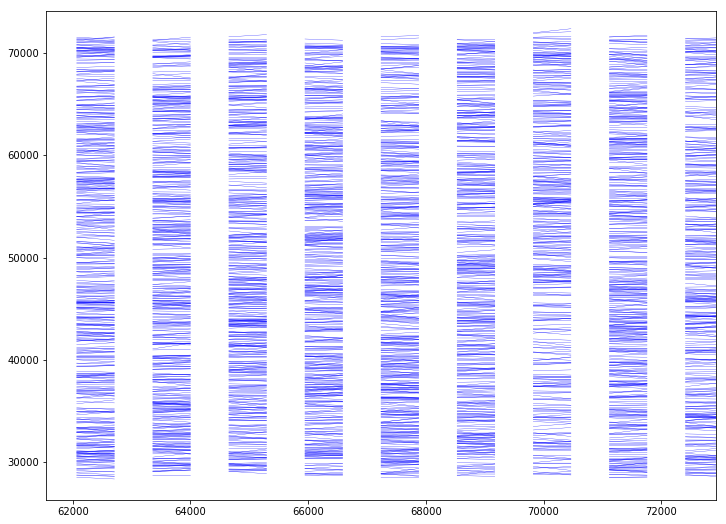

CPU times: user 426 ms, sys: 10 ms, total: 436 ms
Wall time: 559 ms


In [12]:
%%time

quiverargs = dict(color='b', scale_units='xy', angles='xy', 
                  scale=1, headlength=0, headwidth=1, minlength=0,
                  headaxislength=0, width=0.0004)

for d in data:
    plt.quiver(d['z'], d['x'], d['dz'], d['dx'], **quiverargs)
plt.show()

плоскость YZ

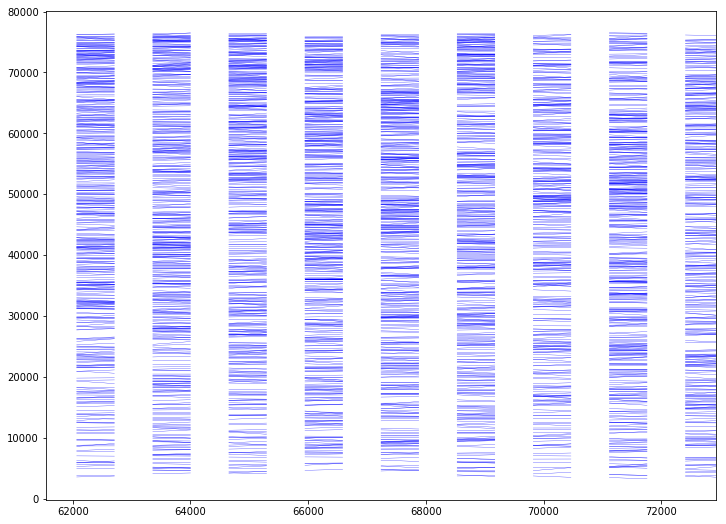

CPU times: user 356 ms, sys: 26 µs, total: 356 ms
Wall time: 355 ms


In [13]:
%%time

quiverargs = dict(color='b', scale_units='xy', angles='xy', 
                  scale=1, headlength=0, headwidth=1, minlength=0,
                  headaxislength=0, width=0.0004)

for d in data:
    plt.quiver(d['z'], d['y'], d['dz'], d['dy'], **quiverargs)
plt.show()

плоскость XY, умножим длину на 2, чтобы было лучше видно

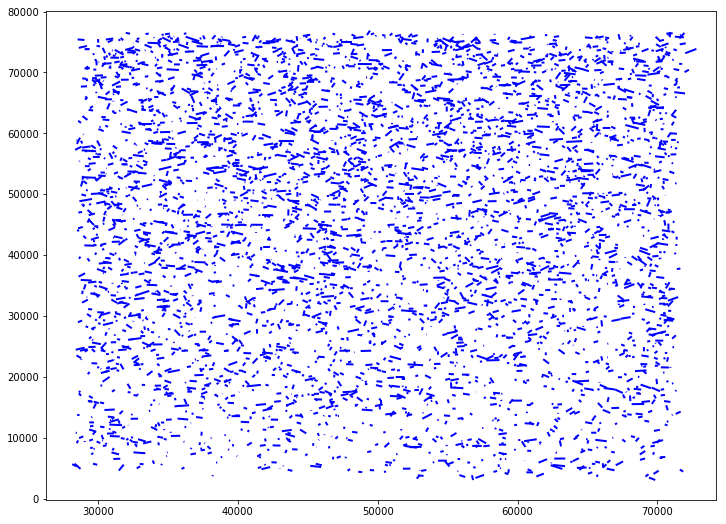

CPU times: user 336 ms, sys: 0 ns, total: 336 ms
Wall time: 336 ms


In [14]:
%%time

quiverargs = dict(color='b', scale_units='xy', angles='xy', 
                  scale=1, headlength=0, headwidth=1, minlength=0, 
                  headaxislength=0, width=0.003)

for d in data:
    plt.quiver(d['x'], d['y'], 2 * d['dx'], 2 * d['dy'], **quiverargs)
plt.show()

Кирпичи в 3D

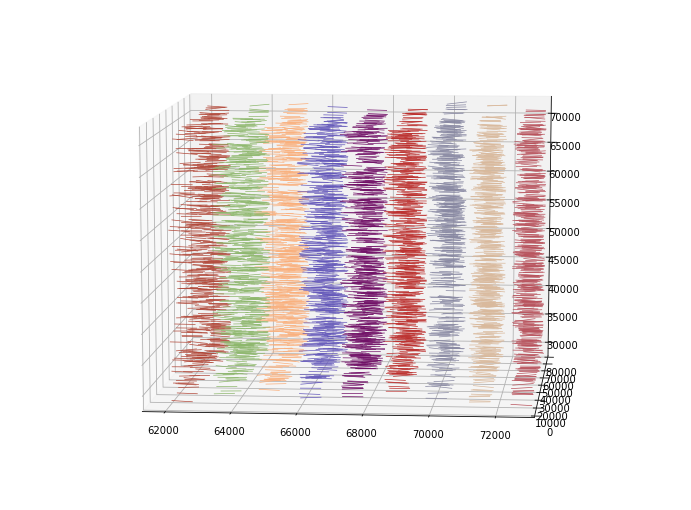

CPU times: user 1.3 s, sys: 3.35 ms, total: 1.3 s
Wall time: 1.3 s


In [15]:
%%time

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=10, azim=-85)

np.random.seed(123)

c = 0
    
for d in data:
    ax.quiver(d['z'], d['y'], d['x'], d['dz'], d['dy'], d['dx'], 
              colors=np.repeat(np.random.rand(1, 3), len(d['x']), axis=0), arrow_length_ratio=0, linewidths=0.7)
plt.show()

Немного ливней в 3D

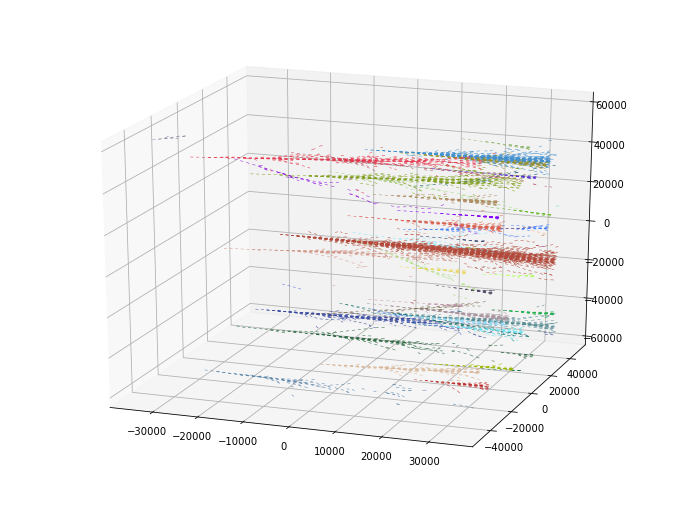

CPU times: user 3.34 s, sys: 9.96 ms, total: 3.34 s
Wall time: 3.34 s


In [16]:
%%time

np.random.seed(123)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.view_init(elev=20, azim=-70)

i = 0
for s in showers:
    ax.quiver(s['z'], s['y'], s['x'], s['dz'], s['dy'], s['dx'], color=(np.random.rand(1,3)), arrow_length_ratio=0, linewidths=0.5)
    i += 1
    if i == 50:
        break
plt.show()

#### Теперь понятно что за данные, отмасштабируем их в кубы [0.0, 1.0], 10 слоев, расстояние между слоями: 0.1

In [17]:
first, last = 48, 58
h = 1293
bricks = {}

for ind in range(first, last):
    bricks[ind - first] = root_numpy.root2array("129294.{p}.1.1000.cp.root".format(p=ind), 
                                   treename="couples", 
                                   branches=["s.eX", "s.eY", "s.eZ", "s.eTX", "s.eTY","s.eChi2"])

In [18]:
mc = root_numpy.root2array("mcdata_taue2.root",
                           treename="Data",
                           branches=["Event_id", "ele_P",
                                     "BT_X", "BT_Y", "BT_Z",
                                     "BT_SX", "BT_SY",
                                     "ele_x", "ele_y", "ele_z",
                                     "ele_sx", "ele_sy",
                                     "chisquare"])

In [19]:
def normalize(a):
    return (a - np.amin(a))/(np.amax(a) - np.amin(a))

def normalize_mm(a, minn, maxx):
    return (a - minn)/(maxx - minn)

In [20]:
sh_norm = []

for smc in mc:
    if (len(smc[2]) <= 1):
        continue
    xs = normalize_mm(smc[2], sh_x_min, sh_x_max)
    ys = normalize_mm(smc[3], sh_y_min, sh_y_max)
    zs = np.round((smc[4] - smc[4][0]) / h) * 0.1
    txs = smc[5]
    tys = smc[6]
    xe = 0.1 * 0.5 * np.tan(txs)
    ye = 0.1 * 0.5 * np.tan(tys)
    ze = 0.1 * 0.5 * np.ones(len(xs))
    sh_norm.append({'x': xs, 'y': ys, 'z': zs, 'dx': xe, 'dy': ye, 'dz': ze})

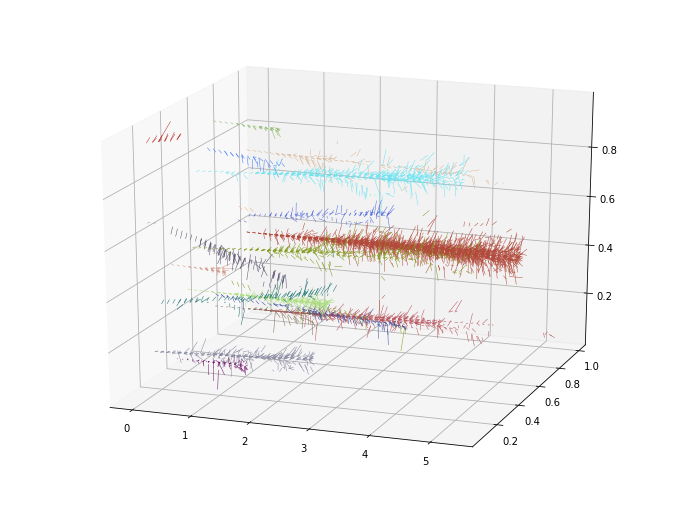

CPU times: user 2.1 s, sys: 3.29 ms, total: 2.1 s
Wall time: 2.1 s


In [21]:
%%time

np.random.seed(123)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.view_init(elev=20, azim=-70)

i = 0
for s in sh_norm:
    ax.quiver(s['z'], s['y'], s['x'], s['dz'], s['dy'], s['dx'], color=(np.random.rand(1,3)), arrow_length_ratio=0, linewidths=0.5)
    i += 1
    if i > 20:
        break
plt.show()

In [22]:
data_norm = []

for brick in bricks:
    nbr = len(bricks[brick])
    xs = np.zeros(nbr)
    ys = np.zeros(nbr)
    zs = 0.1 * brick * np.ones(nbr)
    txs = np.zeros(nbr)
    tys = np.zeros(nbr)
    for i in range(nbr):
        p = bricks[brick][i]
        xs[i] = p[0]
        ys[i] = p[1]
        txs[i] = p[3]
        tys[i] = p[4]
    xs = normalize(xs)
    ys = normalize(ys)
    xe = 0.1 * 0.5 * np.tan(txs)
    ye = 0.1 * 0.5 * np.tan(tys)
    ze = 0.1 * 0.5 * np.ones(nbr)
    data_norm.append({'x': xs, 'y': ys, 'z': zs, 'dx': xe, 'dy': ye, 'dz': ze})

Если много оперативки и не лень подождать, то можно раскомментировать

In [23]:
#%%time

#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.view_init(elev=10, azim=-85)

#np.random.seed(123)
    
#for d in data_norm:
#    ax.quiver(d['z'][::1000], d['y'][::1000], d['x'][::1000], d['dz'][::1000], d['dy'][::1000], d['dx'][::1000], 
#              colors=np.repeat(np.random.rand(1, 3), len(d['x']), axis=0), arrow_length_ratio=0, linewidths=0.7)
#plt.show()

функция, которая принимает массив из начальных координат ливней (x,y,layer_num) (x,y в отрезке [0.0, 1.0], layer_num - целое число, может быть отрицательным, не больше количества кирпичей (10) ) и соотношение между числом черточек ливней к числу черточек фонового сигнала, возвращает пару: 1. массив слоев, внутри кажого слоя массив координат (x,y,z,dx,dy,dz) фонового сигнала, 2. массив ливней, внутри каждого один ливень с координатами ливней (x,y,z,dx,dy,dz). координаты в отрезке [0.0,1.0]

In [24]:
def F(origins, ratio):
    # showers
    nshowers = len(origins)
    sh_copy = np.copy(sh_norm)
    np.random.shuffle(sh_copy)
    use_showers = sh_copy[:nshowers]
    gen_sh = []
    for i in range(nshowers):
        x = origins[i][0] + (use_showers[i]['x'] - use_showers[i]['x'][0])
        y = origins[i][1] + (use_showers[i]['y'] - use_showers[i]['y'][0])
        z = use_showers[i]['z'] - use_showers[i]['z'][0]
        if (origins[i][2] >= 10):
            raise Exception('Origin Z out of range, must be less than 10, shower', i)
        zmax = np.amax(z)
        if zmax + 0.1 * origins[i][2] < 0.85: # must be less than 0.9
            o2 = 0.9 - zmax
            print('WARN not enough layers in shower %d, changing origin to %d' % (i, int(o2 / 0.1)))
        else:
            o2 = origins[i][2] * 0.1
        z += o2
        dx = use_showers[i]['dx']
        dy = use_showers[i]['dy']
        dz = use_showers[i]['dz']
        # drop values out of [0,1]
        res = []
        for i in range(len(x)):
            if (0 <= x[i] <= 1 and 0 <= y[i] <= 1 and -0.01 <= z[i] <= 0.91):
                res.append([x[i], y[i], z[i], dx[i], dy[i], dz[i]])
        if len(res) != 0:
            gen_sh.append(np.transpose(res))
    # bricks
    total_sh = 0
    total_br = 0
    for s in gen_sh:
        total_sh += s.shape[1]
    data_copy = np.copy(data_norm)
    for d in data_copy:
        total_br += len(d['x'])
    use_br = total_sh / ratio
    use_ratio = use_br / total_br
    if use_ratio > 1:
        use_ratio = 1
    print(use_ratio)
    gen_br = []
    for d in range(len(data_copy)):
        res = []
        dd = data_copy[d]
        for i in range(len(dd['x'])):
            #if (0 <= dd['x'][i] <= 1 and 0 <= dd['y'][i] <= 1 and -0.01 <= dd['z'][i] <= 0.91):
            res.append([dd['x'][i], dd['y'][i], dd['z'][i], dd['dx'][i], dd['dy'][i], dd['dz'][i]])
        np.random.shuffle(res)
        use_l_br = int(len(dd['x']) * use_ratio)
        print('Layer points:', use_l_br)
        res = np.copy(res[:use_l_br])
        res = np.transpose(res)
        gen_br.append(res)
    return gen_br, gen_sh

In [25]:
origins = [[0.3, 0.3, 0], [0.7, 0.7, 4], [0.5, 0.5, -15], [0.2, 0.4, -7]]
np.random.seed(345)
brick, show = F(origins, 0.05)

WARN not enough layers in shower 0, changing origin to 4
WARN not enough layers in shower 3, changing origin to 4
0.0004044455617201552
Layer points: 190
Layer points: 199
Layer points: 200
Layer points: 202
Layer points: 201
Layer points: 190
Layer points: 158
Layer points: 197
Layer points: 167
Layer points: 470


Финальный результат в 3D

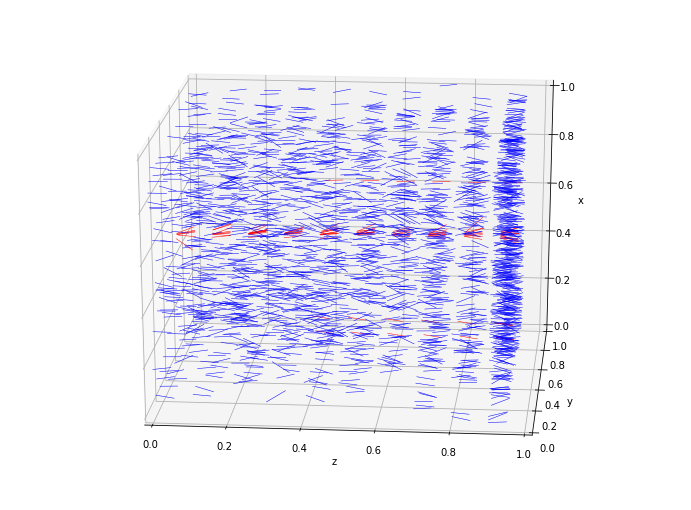

CPU times: user 816 ms, sys: 3.31 ms, total: 819 ms
Wall time: 818 ms


In [26]:
%%time
np.random.seed(123)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

ax.view_init(elev=20, azim=-85)
ax.set_xlabel('z')
ax.set_ylabel('y')
ax.set_zlabel('x')

for b in brick:
    ax.quiver(b[2], b[1], b[0], b[5], b[4], b[3], color='b', arrow_length_ratio=0, linewidths=0.5)

for s in show:
    ax.quiver(s[2], s[1], s[0], s[5], s[4], s[3], color='r', arrow_length_ratio=0, linewidths=0.5)
plt.show()

Плоскость XZ

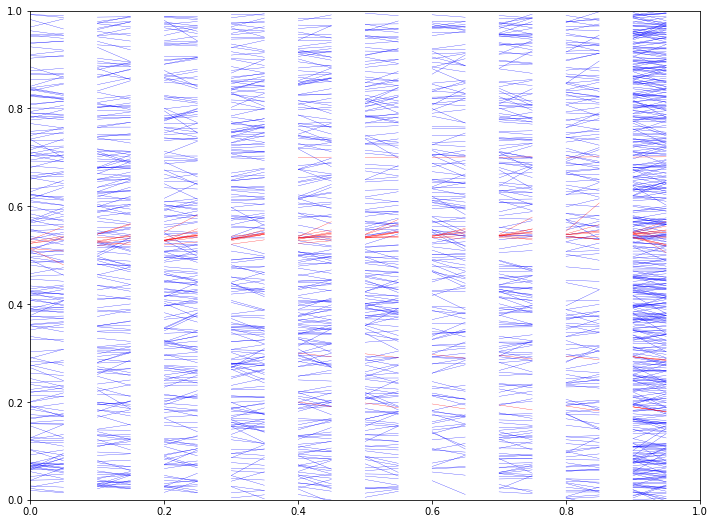

CPU times: user 321 ms, sys: 0 ns, total: 321 ms
Wall time: 320 ms


In [27]:
%%time

quiverargs = dict(scale_units='xy', angles='xy', 
                  scale=1, headlength=0, headwidth=1, minlength=0,
                  headaxislength=0, width=0.0004)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim([0,1])
ax.set_ylim([0,1])

for b in brick:
    plt.quiver(b[2], b[0], b[5], b[3], color='b', **quiverargs)
for s in show:
    ax.quiver(s[2], s[0], s[5], s[3], color='r', **quiverargs)
plt.show()

Плоскость YZ

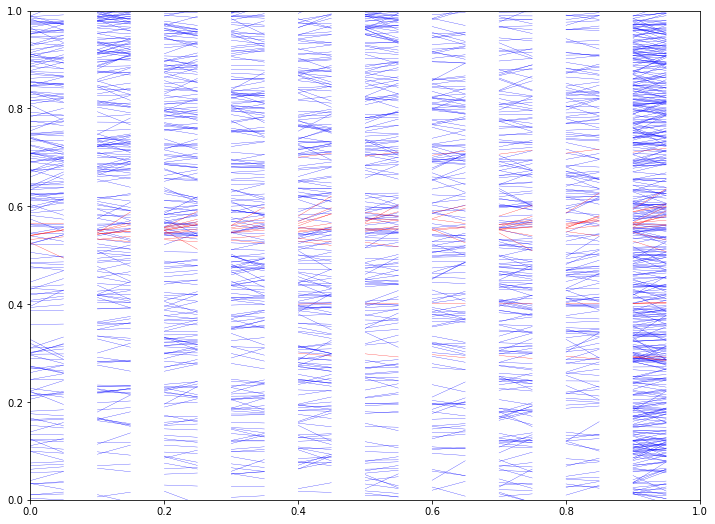

CPU times: user 367 ms, sys: 0 ns, total: 367 ms
Wall time: 367 ms


In [28]:
%%time

quiverargs = dict(scale_units='xy', angles='xy', 
                  scale=1, headlength=0, headwidth=1, minlength=0,
                  headaxislength=0, width=0.0004)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim([0,1])
ax.set_ylim([0,1])

for b in brick:
    plt.quiver(b[2], b[1], b[5], b[4], color='b', **quiverargs)
for s in show:
    ax.quiver(s[2], s[1], s[5], s[4], color='r', **quiverargs)
plt.show()

Плоскость XY

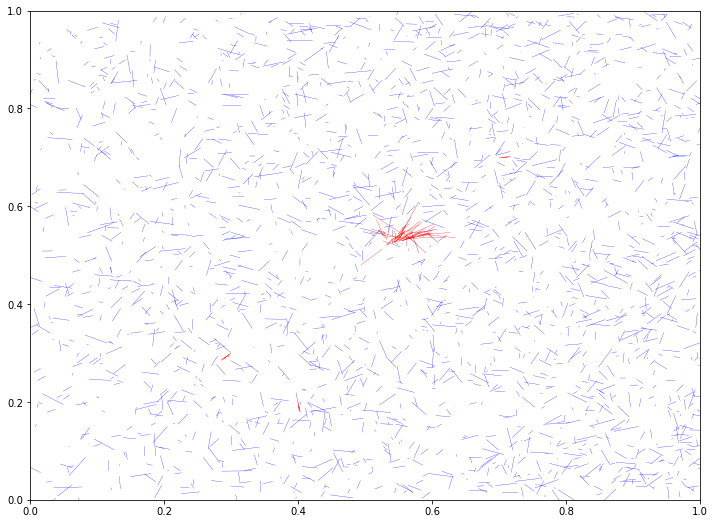

CPU times: user 299 ms, sys: 6.66 ms, total: 306 ms
Wall time: 306 ms


In [29]:
%%time

quiverargs = dict(scale_units='xy', angles='xy', 
                  scale=1, headlength=0, headwidth=1, minlength=0,
                  headaxislength=0, width=0.0004)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim([0,1])
ax.set_ylim([0,1])

for b in brick:
    plt.quiver(b[1], b[0], b[4], b[3], color='b', **quiverargs)
for s in show:
    ax.quiver(s[1], s[0], s[4], s[3], color='r', **quiverargs)
plt.show()